# Create a heatmap of cells-by-position to see if reads concentrate to certain positions

In [47]:
import glob
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import pysam
import time
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
%matplotlib inline
import seaborn as sns
from os.path import join
from plot_CB_coverage import plot_coverage_barcode_file

In [2]:
from numpanpar import parallel_df as pardf

In [49]:
BARCODE_INFO = "../data/processed/A/A_barcode_data.p"
maxBP = 16571
PILEUP_DIR = "../data/processed/A/A_scPileup_200/"
BARCODE_TEXT = "../data/raw/GSM3271867/barcodes/GSE117131_Zhu_SC-10X_human_annotation.txt"
BARCODE_TEXT_MOUSE = "../data/raw/GSM3271867/barcodes/GSE117131_Zhu_SC-10X_mouse_annotation.txt"
SAVEFIG = "../figures/A/Abarcode_MT_CB.png"
SAVEFIG_HIST = "../figures/A/Abarcode_MT_hist.png"

Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001

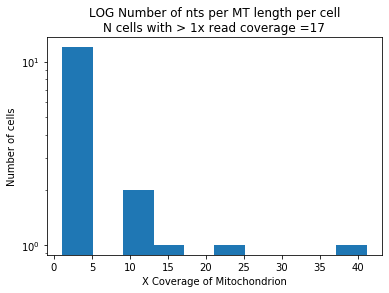

In [50]:
plot_coverage_barcode_file(BARCODE_INFO,
                           [BARCODE_TEXT, BARCODE_TEXT_MOUSE], 
                           f_save=SAVEFIG, maxBP=16571)


## Load CB's, get ones that have over average read coverage of 1x

In [4]:
[CR_read_number,CB_read_number,BC_read_number, barcodes, corrected_barcodes, barcode_pairs] = pickle.load(open(BARCODE_INFO,"rb"))

# Load barcode text file

## Without mouse barcode

In [5]:
barcode_text = pd.read_csv(BARCODE_TEXT, sep="\t", index_col=0)
#barcode_text_mouse = pd.read_csv(BARCODE_TEXT_MOUSE, sep="\t", index_col=0)

#barcode_text = pd.concat((barcode_text,barcode_text_mouse ))
barcode_text

,Barcode,Sample.Name
1,AAAGATGAGGGTATCG.1,Human1_001
2,AAATGCCAGTACATGA.1,Human1_001
3,AACCATGCATCACGAT.1,Human1_001
4,AACGTTGTCTATGTGG.1,Human1_001
5,AACTCCCGTCTCTCGT.1,Human1_001
...,...,...
2071,TTTGGTTCATACAGCT.4,Human2_002
2072,TTTGGTTTCCTCTAGC.4,Human2_002
2073,TTTGTCAAGCTTCGCG.4,Human2_002
2074,TTTGTCAGTAGGCATG.4,Human2_002


In [6]:
print(len(barcode_text["Barcode"].unique()))

print(len(barcode_text))

2075
2075


In [9]:
CB_read_MT = dict()
cb = 0
for i in barcode_text["Barcode"].values:
    i = i.replace(".", "-")
    #print(i)
    if i in CB_read_number:
        curr = barcode_text[barcode_text["Barcode"] == i.replace("-",".")]
        #print(barcode_text[barcode_text["Barcode"] == i.replace("-",".")])
        #print(i)
        
        print(curr["Sample.Name"].values[0])
        if curr["Sample.Name"].values[0] == "Human2_002":
            print("Here")
        cb += 1  
        #if CB_read_number[i]*100 >= maxBP:
        CB_read_MT[i] = CB_read_number[i] #*100
        
        
print(cb)
print(len(CB_read_MT))

Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001

Text(0.5, 1.0, 'Reads per cell histogram')

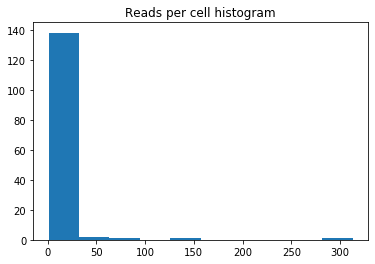

In [12]:
plt.hist(list(CB_read_MT.values()))#, bins=7000,)
#plt.xlim([-1,100]);
plt.title("Reads per cell histogram")

## Create matrix and load in values from scPileup

In [13]:
def fill_df_coverage(df, pileup_dir, is_par=False):
    not_done = []
    for ind in tqdm(df.index):
        f = glob.glob(os.path.join(pileup_dir,"CB_" + ind + ".coverage.txt"))
        if len(f) == 0:  
            print("Not here")
            not_done.append(ind)
        else:
            curr = pd.read_csv(f[0], header=None)
            for _, val in curr.iterrows():
                df.loc[ind, val[0]] = val[2]
    print(f"Number of missing files: {len(not_done)}")
    return df

In [14]:
sc_coverage = pd.DataFrame(index=CB_read_MT.keys(),columns= range(1,maxBP+1),dtype=int)
sc_coverage.loc[:,:] = 0
sc_coverage

,1,2,3,4,5,6,7,8,9,10,...,16562,16563,16564,16565,16566,16567,16568,16569,16570,16571
AAATGCCAGTACATGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACTGGTTCACATACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCGTAAAGAATTCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATACCACGTCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATGTCAGTCACTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGGTCAGCTAGTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTCGGTCTCAATCTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTCTACACACGAAATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGCGTCCAGCTGCTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
sc_coverage = pardf(sc_coverage,fill_df_coverage, func_args=(PILEUP_DIR,), num_processes=32)
sc_coverage.to_csv("../data/processed/A/sc_coverage_barcodeText.csv")

#sc_coverage = fill_df_coverage(sc_coverage,PILEUP_DIR)
sc_coverage

  0%|          | 0/4 [00:00<?, ?it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here


100%|██████████| 4/4 [00:00<00:00, 285.82it/s]

Not here
Not here


Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]9.52it/s]

Number of missing files: 4
Not here


  0%|          | 0/4 [00:00<?, ?it/s]


Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Number of missing files: 4


100%|██████████| 4/4 [00:00<00:00, 224.11it/s]

Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]


Not here
Number of missing files: 4
Not here


  0%|          | 0/4 [00:00<?, ?it/s]9.45it/s]


Not here
Not here
Number of missing files: 4
Not here


  0%|          | 0/4 [00:00<?, ?it/s]8.64it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here


Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Number of missing files: 4


  0%|          | 0/4 [00:00<?, ?it/s]

Not here


100%|██████████| 4/4 [00:00<00:00, 196.14it/s]

Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]


Not here
Number of missing files: 4
Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]0.71it/s]

Not here


Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]8.92it/s]

Number of missing files: 4
Not here
Not here


Number of missing files: 4


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]3.35it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]


Not here
Number of missing files: 4


  0%|          | 0/3 [00:00<?, ?it/s]

Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 163.82it/s]

Not here
Not here



100%|██████████| 4/4 [00:00<00:00, 141.95it/s]

Not here
Number of missing files: 4
Not here


Number of missing files: 4
Not here
Not here
Not here
Not here


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 113.08it/s]

Not here


Not here
Not here
Number of missing files: 4
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 95.33it/s]


Number of missing files: 4


  0%|          | 0/4 [00:00<?, ?it/s]

Number of missing files: 4


  0%|          | 0/4 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 58.02it/s]

Not here


Not here
Not here
Number of missing files: 4
Not here


100%|██████████| 4/4 [00:00<00:00, 56.75it/s]


Not here
Not here
Number of missing files: 4
Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 55.57it/s]

Not here
Not here


Not here
Number of missing files: 4
Not here


100%|██████████| 4/4 [00:00<00:00, 55.33it/s]

Not here
Not here


Not here
Not here
Number of missing files: 4
Not here
Not here
Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 53.32it/s]

Not here


Not here


100%|██████████| 4/4 [00:00<00:00, 52.97it/s]

Number of missing files: 4
Not here
Not here


Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 52.69it/s]

Not here
Number of missing files: 4
Not here


Not here


100%|██████████| 4/4 [00:00<00:00, 53.13it/s]

Not here
Number of missing files: 4




100%|██████████| 3/3 [00:00<00:00, 45.45it/s]

Not here
Not here
Number of missing files: 4
Not here


100%|██████████| 4/4 [00:00<00:00, 52.64it/s]

Number of missing files: 3


100%|██████████| 4/4 [00:00<00:00, 53.77it/s]

Not here


Not here


Not here
Number of missing files: 4
Number of missing files: 4
Not here


100%|██████████| 4/4 [00:00<00:00, 52.99it/s]

Not here
Not here


100%|██████████| 4/4 [00:00<00:00, 53.87it/s]


Not here


100%|██████████| 4/4 [00:00<00:00, 53.80it/s]


Number of missing files: 4
Not here


100%|██████████| 4/4 [00:00<00:00, 54.29it/s]

Not here
Number of missing files: 4


Number of missing files: 4
Not here



100%|██████████| 4/4 [00:00<00:00, 54.96it/s]

Not here


100%|██████████| 4/4 [00:00<00:00, 54.48it/s]

Number of missing files: 4
Not here
Number of missing files: 4


Not here


Number of missing files: 4
Not here


100%|██████████| 4/4 [00:00<00:00, 58.04it/s]

Number of missing files: 4


100%|██████████| 4/4 [00:00<00:00, 75.05it/s]

100%|██████████| 4/4 [00:00<00:00, 79.51it/s]

Number of missing files: 4
Number of missing files: 4


Number of missing files: 4


 75%|███████▌  | 3/4 [00:02<00:00,  1.06it/s]

Not here


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


Number of missing files: 3


,1,2,3,4,5,6,7,8,9,10,...,16562,16563,16564,16565,16566,16567,16568,16569,16570,16571
AAATGCCAGTACATGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACTGGTTCACATACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCGTAAAGAATTCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATACCACGTCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATGTCAGTCACTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGGTCAGCTAGTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTCGGTCTCAATCTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTCTACACACGAAATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGCGTCCAGCTGCTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
sc_coverage = pd.read_csv("../data/processed/A/sc_coverage_barcodeText.csv", index_col=0)

In [17]:
not_done = sc_coverage[((sc_coverage==0).all(axis=1))].index
print(len(not_done))

142


In [18]:
CB_read_MT

{'AAATGCCAGTACATGA-1': 1,
 'AACTGGTTCACATACG-1': 1,
 'ACCGTAAAGAATTCCC-1': 1,
 'ACGATACCACGTCAGC-1': 9,
 'ACGATGTCAGTCACTA-1': 2,
 'ACGCCAGAGAGCCTAG-1': 3,
 'ACTGAACAGGGCTCTC-1': 8,
 'ACTGCTCGTAGCTCCG-1': 5,
 'ACTGTCCCATTGGGCC-1': 2,
 'ACTGTCCTCTTAGAGC-1': 69,
 'ACTTACTAGGACAGCT-1': 3,
 'AGAATAGCAGCTGTGC-1': 1,
 'AGAGCGAAGTGTCTCA-1': 8,
 'AGATTGCGTTTGTGTG-1': 1,
 'AGCATACGTCAACATC-1': 1,
 'AGCGGTCTCATGTCCC-1': 130,
 'AGCTCTCAGAACTGTA-1': 1,
 'AGGCCACCACTTAACG-1': 1,
 'AGTCTTTAGTGGTAGC-1': 3,
 'AGTGTCAGTGATGATA-1': 1,
 'ATAACGCCACTGAAGG-1': 2,
 'ATAAGAGCACTCAGGC-1': 1,
 'ATCATGGAGTCATCCA-1': 5,
 'ATCATGGCATCCGTGG-1': 3,
 'ATCATGGTCAACGAAA-1': 16,
 'ATTACTCCAGTGGAGT-1': 24,
 'ATTATCCAGTATCGAA-1': 15,
 'CAACCAACATCCTTGC-1': 3,
 'CAAGAAAAGTCCATAC-1': 2,
 'CAAGAAAGTGACGGTA-1': 6,
 'CAAGTTGAGACGCACA-1': 7,
 'CAGAGAGGTGGTAACG-1': 5,
 'CAGATCATCTAGCACA-1': 8,
 'CAGCGACCATGGTCAT-1': 1,
 'CATCGGGCAACAACCT-1': 3,
 'CCACCTAGTATAGGGC-1': 1,
 'CCACTACAGAATGTGT-1': 1,
 'CCATGTCTCCTATTCA-1': 1,
 'CCGG

# With mouse annotation

In [19]:
barcode_text = pd.read_csv(BARCODE_TEXT, sep="\t", index_col=0)
barcode_text_mouse = pd.read_csv(BARCODE_TEXT_MOUSE, sep="\t", index_col=0)

barcode_text = pd.concat((barcode_text,barcode_text_mouse ))
barcode_text

print(len(barcode_text["Barcode"].unique()))

print(len(barcode_text))

CB_read_number

CB_read_MT = dict()
cb = 0
for i in barcode_text["Barcode"].values:
    i = i.replace(".", "-")
    #print(i)
    if i in CB_read_number:
        curr = barcode_text[barcode_text["Barcode"] == i.replace("-",".")]
        print(curr["Sample.Name"].values[0])
        if curr["Sample.Name"].values[0] == "Human2_002":
            print("Here")
        cb += 1  
        #if CB_read_number[i]*100 >= maxBP:
        CB_read_MT[i] = CB_read_number[i] #*100
        
        
print(cb)
print(len(CB_read_MT))

36485
36493
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_001
Human1_00

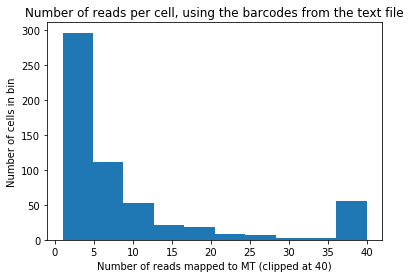

In [46]:
# plt.hist(list(CB_read_MT.values()), bins=7000,)
# plt.xlim([-1,100]);
plt.hist(np.clip(list(CB_read_MT.values()),0,40))
plt.title("Number of reads per cell, using the barcodes from the text file")
plt.ylabel("Number of cells in bin")
plt.xlabel("Number of reads mapped to MT (clipped at 40)")
plt.savefig(SAVEFIG)

## Only 14 of the 574 cells have greater than 200 reads

In [32]:
sc_coverage.shape

(574, 16571)

In [33]:
len(CB_read_MT)

574

In [45]:
(np.array(list(CB_read_MT.values())) > 200).sum()

14

## Create matrix and load in values from scPileup

In [26]:
def fill_df_coverage(df, pileup_dir, is_par=False):
    not_done = []
    for ind in tqdm(df.index):
        f = glob.glob(os.path.join(pileup_dir,"CB_" + ind + ".coverage.txt"))
        if len(f) == 0:  
            print("Not here")
            not_done.append(ind)
        else:
            curr = pd.read_csv(f[0], header=None)
            for _, val in curr.iterrows():
                df.loc[ind, val[0]] = val[2]
    print(f"Number of missing files: {len(not_done)}")
    return df

In [27]:
sc_coverage = pd.DataFrame(index=CB_read_MT.keys(),columns= range(1,maxBP+1),dtype=int)
sc_coverage.loc[:,:] = 0
sc_coverage

,1,2,3,4,5,6,7,8,9,10,...,16562,16563,16564,16565,16566,16567,16568,16569,16570,16571
AAATGCCAGTACATGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACTGGTTCACATACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCGTAAAGAATTCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATACCACGTCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATGTCAGTCACTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCCATATGCTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAAGGTTCCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACACGAGAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTCGTCTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
sc_coverage = pardf(sc_coverage,fill_df_coverage, func_args=(PILEUP_DIR,), num_processes=32)
sc_coverage.to_csv("../data/processed/A/sc_coverage_barcodeText_mouse.csv")

#sc_coverage = fill_df_coverage(sc_coverage,PILEUP_DIR)
sc_coverage

  0%|          | 0/17 [00:00<?, ?it/s]

Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 202.66it/s]

Not here


Not here
Not here
Number of missing files: 17
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]03.92it/s]

Not here


Not here
Not here
Number of missing files: 17
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 196.50it/s]

Not here
Not here


Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Number of missing files: 17


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 141.75it/s]

Not here
Not here


 82%|████████▏ | 14/17 [00:00<00:00, 130.65it/s]

Not here


100%|██████████| 17/17 [00:00<00:00, 140.15it/s]

Not here


Not here
Number of missing files: 17
Not here
Not here


  0%|          | 0/17 [00:00<?, ?it/s]

Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 140.48it/s]

Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 139.10it/s]


Not here
Not here
Number of missing files: 17
Not here


  0%|          | 0/13 [00:00<?, ?it/s]

Not here
Not here
Not here
Not here
Not here


 76%|███████▋  | 13/17 [00:00<00:00, 97.05it/s]

Not here
Not here


 71%|███████   | 12/17 [00:00<00:00, 92.20it/s]

Not here
Not here


 41%|████      | 7/17 [00:00<00:00, 65.14it/s]

Not here
Not here
Not here
Not here
Not here


 35%|███▌      | 6/17 [00:00<00:00, 57.09it/s]

Not here
Not here
Not here
Not here


 35%|███▌      | 6/17 [00:00<00:00, 59.54it/s]

Not here


 53%|█████▎    | 9/17 [00:00<00:00, 76.03it/s]

Not here


 35%|███▌      | 6/17 [00:00<00:00, 56.18it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 29%|██▉       | 5/17 [00:00<00:00, 47.10it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 101.61it/s]

Not here
Not here



 24%|██▎       | 4/17 [00:00<00:00, 37.46it/s]

Not here
Not here
Number of missing files: 17
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 24%|██▎       | 4/17 [00:00<00:00, 36.00it/s]

Not here


 24%|██▎       | 4/17 [00:00<00:00, 35.91it/s]

Not here
Not here
Not here
Not here
Not here
Not here


 24%|██▎       | 4/17 [00:00<00:00, 36.24it/s]

Not here
Not here


 24%|██▎       | 4/17 [00:00<00:00, 37.69it/s]

Not here


 24%|██▎       | 4/17 [00:00<00:00, 39.51it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 24%|██▎       | 4/17 [00:00<00:00, 31.83it/s]

Not here
Not here
Not here


 24%|██▎       | 4/17 [00:00<00:00, 34.04it/s]

Not here


 31%|███       | 4/13 [00:00<00:00, 34.61it/s]

Not here


 24%|██▎       | 4/17 [00:00<00:00, 34.29it/s]

Not here


 29%|██▉       | 5/17 [00:00<00:00, 33.23it/s]

Not here


 29%|██▉       | 5/17 [00:00<00:00, 34.28it/s]

Not here


100%|██████████| 17/17 [00:00<00:00, 65.24it/s]

Not here
Not here


 65%|██████▍   | 11/17 [00:00<00:00, 53.21it/s]

Not here
Not here


 29%|██▉       | 5/17 [00:00<00:00, 35.61it/s]

Not here


Not here


 59%|█████▉    | 10/17 [00:00<00:00, 49.54it/s]

Not here
Number of missing files: 17
Not here


 59%|█████▉    | 10/17 [00:00<00:00, 50.99it/s]

Not here


 76%|███████▋  | 13/17 [00:00<00:00, 58.66it/s]

Not here
Not here
Not here


 59%|█████▉    | 10/17 [00:00<00:00, 49.19it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 53%|█████▎    | 9/17 [00:00<00:00, 44.30it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 53%|█████▎    | 9/17 [00:00<00:00, 40.00it/s]

Not here
Not here
Not here
Not here


 47%|████▋     | 8/17 [00:00<00:00, 34.81it/s]

Not here
Not here


 47%|████▋     | 8/17 [00:00<00:00, 35.71it/s]

Not here


 47%|████▋     | 8/17 [00:00<00:00, 36.85it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 53%|█████▎    | 9/17 [00:00<00:00, 36.06it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 53%|█████▎    | 9/17 [00:00<00:00, 30.61it/s]

Not here
Not here


 53%|█████▎    | 9/17 [00:00<00:00, 31.99it/s]

Not here


 69%|██████▉   | 9/13 [00:00<00:00, 32.35it/s]

Not here


 53%|█████▎    | 9/17 [00:00<00:00, 32.10it/s]

Not here


 59%|█████▉    | 10/17 [00:00<00:00, 31.46it/s]

Not here
Not here
Not here


 59%|█████▉    | 10/17 [00:00<00:00, 32.08it/s]

Not here


 76%|███████▋  | 13/17 [00:00<00:00, 35.35it/s]

Not here


 94%|█████████▍| 16/17 [00:00<00:00, 41.96it/s]

Not here


 88%|████████▊ | 15/17 [00:00<00:00, 40.39it/s]

Not here
Not here


 71%|███████   | 12/17 [00:00<00:00, 30.39it/s]

Not here


 65%|██████▍   | 11/17 [00:00<00:00, 31.98it/s]

Not here


 88%|████████▊ | 15/17 [00:00<00:00, 40.32it/s]

Not here


 65%|██████▍   | 11/17 [00:00<00:00, 32.49it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 42.24it/s]

Not here
Not here


Not here
Number of missing files: 17
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 41.63it/s]

Not here


Not here
Number of missing files: 17
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 41.52it/s]

Not here


Not here
Not here
Number of missing files: 17
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 41.85it/s]

Not here


Not here
Number of missing files: 17
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 13/13 [00:00<00:00, 39.10it/s]

Not here
Not here


Not here
Number of missing files: 13
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 41.54it/s]

Not here


Not here


100%|██████████| 17/17 [00:00<00:00, 42.81it/s]

Not here
Number of missing files: 17


Not here
Not here
Number of missing files: 17
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 41.83it/s]

Not here



100%|██████████| 17/17 [00:00<00:00, 42.86it/s]

Not here
Not here


Number of missing files: 17


100%|██████████| 17/17 [00:00<00:00, 43.32it/s]

Not here
Number of missing files: 17


Not here
Not here


100%|██████████| 17/17 [00:00<00:00, 43.60it/s]

Number of missing files: 17


100%|██████████| 17/17 [00:00<00:00, 44.11it/s]


Not here


100%|██████████| 17/17 [00:00<00:00, 44.65it/s]


Not here
Number of missing files: 17
Not here
Number of missing files: 17



100%|██████████| 17/17 [00:00<00:00, 47.74it/s]


Number of missing files: 17


Number of missing files: 17
Number of missing files: 17
Number of missing files: 17


 18%|█▊        | 3/17 [00:02<00:12,  1.15it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:02<00:00,  6.44it/s]


Number of missing files: 16


 12%|█▏        | 2/17 [00:03<00:23,  1.54s/it]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:03<00:00,  5.46it/s]


Number of missing files: 16


 24%|██▎       | 4/17 [00:03<00:09,  1.30it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:03<00:00,  5.51it/s]


Number of missing files: 16


 88%|████████▊ | 15/17 [00:03<00:00,  3.14it/s]

Not here
Not here


100%|██████████| 17/17 [00:03<00:00,  5.23it/s]


Number of missing files: 16


 12%|█▏        | 2/17 [00:03<00:27,  1.81s/it]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 59%|█████▉    | 10/17 [00:04<00:01,  4.20it/s]

Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:04<00:00,  3.77it/s]


Number of missing files: 16


 12%|█▏        | 2/17 [00:05<00:41,  2.80s/it]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


 65%|██████▍   | 11/17 [00:05<00:08,  1.35s/it]

Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:05<00:00,  2.87it/s]


Number of missing files: 15


 24%|██▎       | 4/17 [00:06<00:19,  1.52s/it]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:06<00:00,  2.66it/s]


Number of missing files: 16


 82%|████████▏ | 14/17 [00:06<00:01,  1.93it/s]

Not here
Not here
Not here


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Number of missing files: 16


 41%|████      | 7/17 [00:07<00:11,  1.11s/it]

Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:07<00:00,  2.30it/s]


Number of missing files: 16


 88%|████████▊ | 15/17 [00:08<00:02,  1.13s/it]

Not here
Not here


100%|██████████| 17/17 [00:08<00:00,  2.06it/s]


Number of missing files: 15


 71%|███████   | 12/17 [00:08<00:10,  2.05s/it]

Not here
Not here
Not here
Not here
Not here


100%|██████████| 17/17 [00:08<00:00,  1.93it/s]


Number of missing files: 15


,1,2,3,4,5,6,7,8,9,10,...,16562,16563,16564,16565,16566,16567,16568,16569,16570,16571
AAATGCCAGTACATGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACTGGTTCACATACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCGTAAAGAATTCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATACCACGTCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGATGTCAGTCACTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCCATATGCTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAAGGTTCCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACACGAGAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTCGTCTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
sc_coverage = pd.read_csv("../data/processed/A/sc_coverage_barcodeText_mouse.csv", index_col=0)

In [30]:
not_done = sc_coverage[((sc_coverage==0).all(axis=1))].index
print(len(not_done))

560


In [31]:
CB_read_MT

{'AAATGCCAGTACATGA-1': 1,
 'AACTGGTTCACATACG-1': 1,
 'ACCGTAAAGAATTCCC-1': 1,
 'ACGATACCACGTCAGC-1': 9,
 'ACGATGTCAGTCACTA-1': 2,
 'ACGCCAGAGAGCCTAG-1': 3,
 'ACTGAACAGGGCTCTC-1': 8,
 'ACTGCTCGTAGCTCCG-1': 5,
 'ACTGTCCCATTGGGCC-1': 2,
 'ACTGTCCTCTTAGAGC-1': 69,
 'ACTTACTAGGACAGCT-1': 3,
 'AGAATAGCAGCTGTGC-1': 1,
 'AGAGCGAAGTGTCTCA-1': 8,
 'AGATTGCGTTTGTGTG-1': 1,
 'AGCATACGTCAACATC-1': 1,
 'AGCGGTCTCATGTCCC-1': 130,
 'AGCTCTCAGAACTGTA-1': 1,
 'AGGCCACCACTTAACG-1': 1,
 'AGTCTTTAGTGGTAGC-1': 3,
 'AGTGTCAGTGATGATA-1': 1,
 'ATAACGCCACTGAAGG-1': 2,
 'ATAAGAGCACTCAGGC-1': 1,
 'ATCATGGAGTCATCCA-1': 5,
 'ATCATGGCATCCGTGG-1': 3,
 'ATCATGGTCAACGAAA-1': 16,
 'ATTACTCCAGTGGAGT-1': 24,
 'ATTATCCAGTATCGAA-1': 15,
 'CAACCAACATCCTTGC-1': 3,
 'CAAGAAAAGTCCATAC-1': 2,
 'CAAGAAAGTGACGGTA-1': 6,
 'CAAGTTGAGACGCACA-1': 7,
 'CAGAGAGGTGGTAACG-1': 5,
 'CAGATCATCTAGCACA-1': 8,
 'CAGCGACCATGGTCAT-1': 1,
 'CATCGGGCAACAACCT-1': 3,
 'CCACCTAGTATAGGGC-1': 1,
 'CCACTACAGAATGTGT-1': 1,
 'CCATGTCTCCTATTCA-1': 1,
 'CCGG